# Exploratory feature engineering

In [14]:
%pip install PyWavelets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data.data_fetcher import get_raw_data
from src.features.preprocess_data import fetch_preprocessed_data, get_preprocessed_test_data

from src.visualization.plotting import plot_correlation_matrix



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\gunna\Documents\Maskinlæring\Prosjekt\power-predictor\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [15]:

train_a, train_b, train_c, X_train_estimated_a, X_train_estimated_b, X_train_estimated_c, X_train_observed_a, X_train_observed_b, X_train_observed_c, X_test_estimated_a, X_test_estimated_b, X_test_estimated_c = get_raw_data()



X_train_obs_combined, X_val_obs_combined, y_train_obs_combined, y_val_obs_combined, X_train_est_combined, X_val_est_combined, y_train_est_combined, y_val_est_combined = fetch_preprocessed_data()
X_test_estimated_a_processed, X_test_estimated_b_processed, X_test_estimated_c_processed = get_preprocessed_test_data()



x_whole = pd.concat([X_train_obs_combined, X_val_obs_combined])
y_whole = pd.concat([y_train_obs_combined, y_val_obs_combined])
x_whole.reset_index(drop=True, inplace=True)
y_whole.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)


x_whole.head()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,sun_addition,is_freezing,is_snow,is_rain
0,4.525,1.2805,0.00,0.000000,295.100006,0.0,272.250000,0.000000,0.00000,0.000000,0.0,98.275002,0.0,1.0,1010.349976,0.0,0.0,994.575012,1000.825012,0.0,0.0,89.449997,1007.075012,92.631500,0.075,273.500000,98.275002,22920.250000,3.050,3.050,-0.300,0.0,0,0,1,0.764891,-0.644159,-0.258819,0.965926,0.000000,0.000000,0.000000,0.000000,1.000000,1,0.000000,0,1,0
1,11.125,1.1835,2212441.25,558.775024,2335.850098,0.0,286.450012,107.324997,399611.34375,291.475006,1227068.0,38.799999,1.0,0.0,1019.325012,0.0,0.0,1006.700012,1012.525024,0.0,0.0,46.125000,1018.400024,252.532501,0.100,295.424988,47.775002,57977.351562,2.775,-1.275,-2.425,0.0,1,0,0,-0.109446,-0.993993,-0.707107,-0.707107,31282.554688,0.549938,0.554622,159.975021,0.812140,1,398.799988,0,0,0
2,7.400,1.2565,0.00,0.000000,1415.699951,0.0,279.500000,0.000000,0.00000,0.000000,0.0,57.299999,0.0,1.0,1017.174988,0.0,0.0,1004.375000,1010.500000,0.0,0.0,84.500000,1016.650024,48.666252,0.000,280.575012,57.450001,5837.324707,5.425,4.525,2.950,0.0,1,0,0,-0.952769,-0.303695,0.500000,0.866025,0.000000,0.000000,0.000000,0.000000,0.997389,1,0.000000,0,0,0
3,4.425,1.2915,0.00,0.000000,1323.650024,0.0,271.950012,0.000000,0.00000,0.000000,0.0,93.125000,0.0,1.0,1016.299988,0.0,0.0,1003.150024,1009.425049,0.0,0.0,84.449997,1015.775024,292.688507,0.000,273.250000,94.250000,23476.724609,3.450,2.875,1.900,0.0,1,0,0,-0.651530,0.758623,-0.965926,0.258819,0.000000,0.000000,0.000000,0.000000,0.988064,1,0.000000,0,0,0
4,5.425,1.2525,0.00,0.000000,3277.949951,1.0,274.950012,0.000000,0.00000,0.000000,0.0,80.300003,0.0,1.0,1001.474976,0.0,0.0,986.200012,992.299988,3.6,0.0,75.625000,998.500000,141.130493,0.000,281.049988,97.849998,53599.476562,1.825,-1.600,0.850,0.0,0,0,1,-0.209174,0.977879,0.866025,-0.500000,0.000000,0.000000,0.000000,0.000000,0.820644,1,0.000000,0,0,0


## Removing of features with low variance

In [16]:
# Find name of all the columns that have a correlation of 0.9 or higher with pv_measurement
data_with_target = pd.concat([x_whole, y_whole], axis=1)

# Apply the mask to get the desired rows


# Drop these rows
# data_with_target = data_with_target.drop(data_with_target[(data_with_target['location_b'] == 1) | (data_with_target['location_c'] == 1)].index)
corr_matrix = data_with_target.corr()
corr_matrix["pv_measurement"].sort_values(ascending=False)


pv_measurement                    1.000000
sun_addition                      0.656831
direct_rad:W                      0.621945
sun_product                       0.615783
direct_rad_1h:J                   0.612858
clear_sky_rad:W                   0.603610
modified_solar_elevation          0.598037
clear_sky_energy_1h:J             0.595112
diffuse_rad:W                     0.528730
diffuse_rad_1h:J                  0.523964
effective_radiation               0.417121
is_day:idx                        0.393439
location_a                        0.353865
residual_radiation                0.316118
t_1000hPa:K                       0.291431
dew_point_2m:K                    0.224074
absolute_humidity_2m:gm3          0.218691
visibility:m                      0.159647
pressure_100m:hPa                 0.152322
pressure_50m:hPa                  0.148374
sfc_pressure:hPa                  0.144417
msl_pressure:hPa                  0.134058
sin_hour                          0.125228
cloud_base_

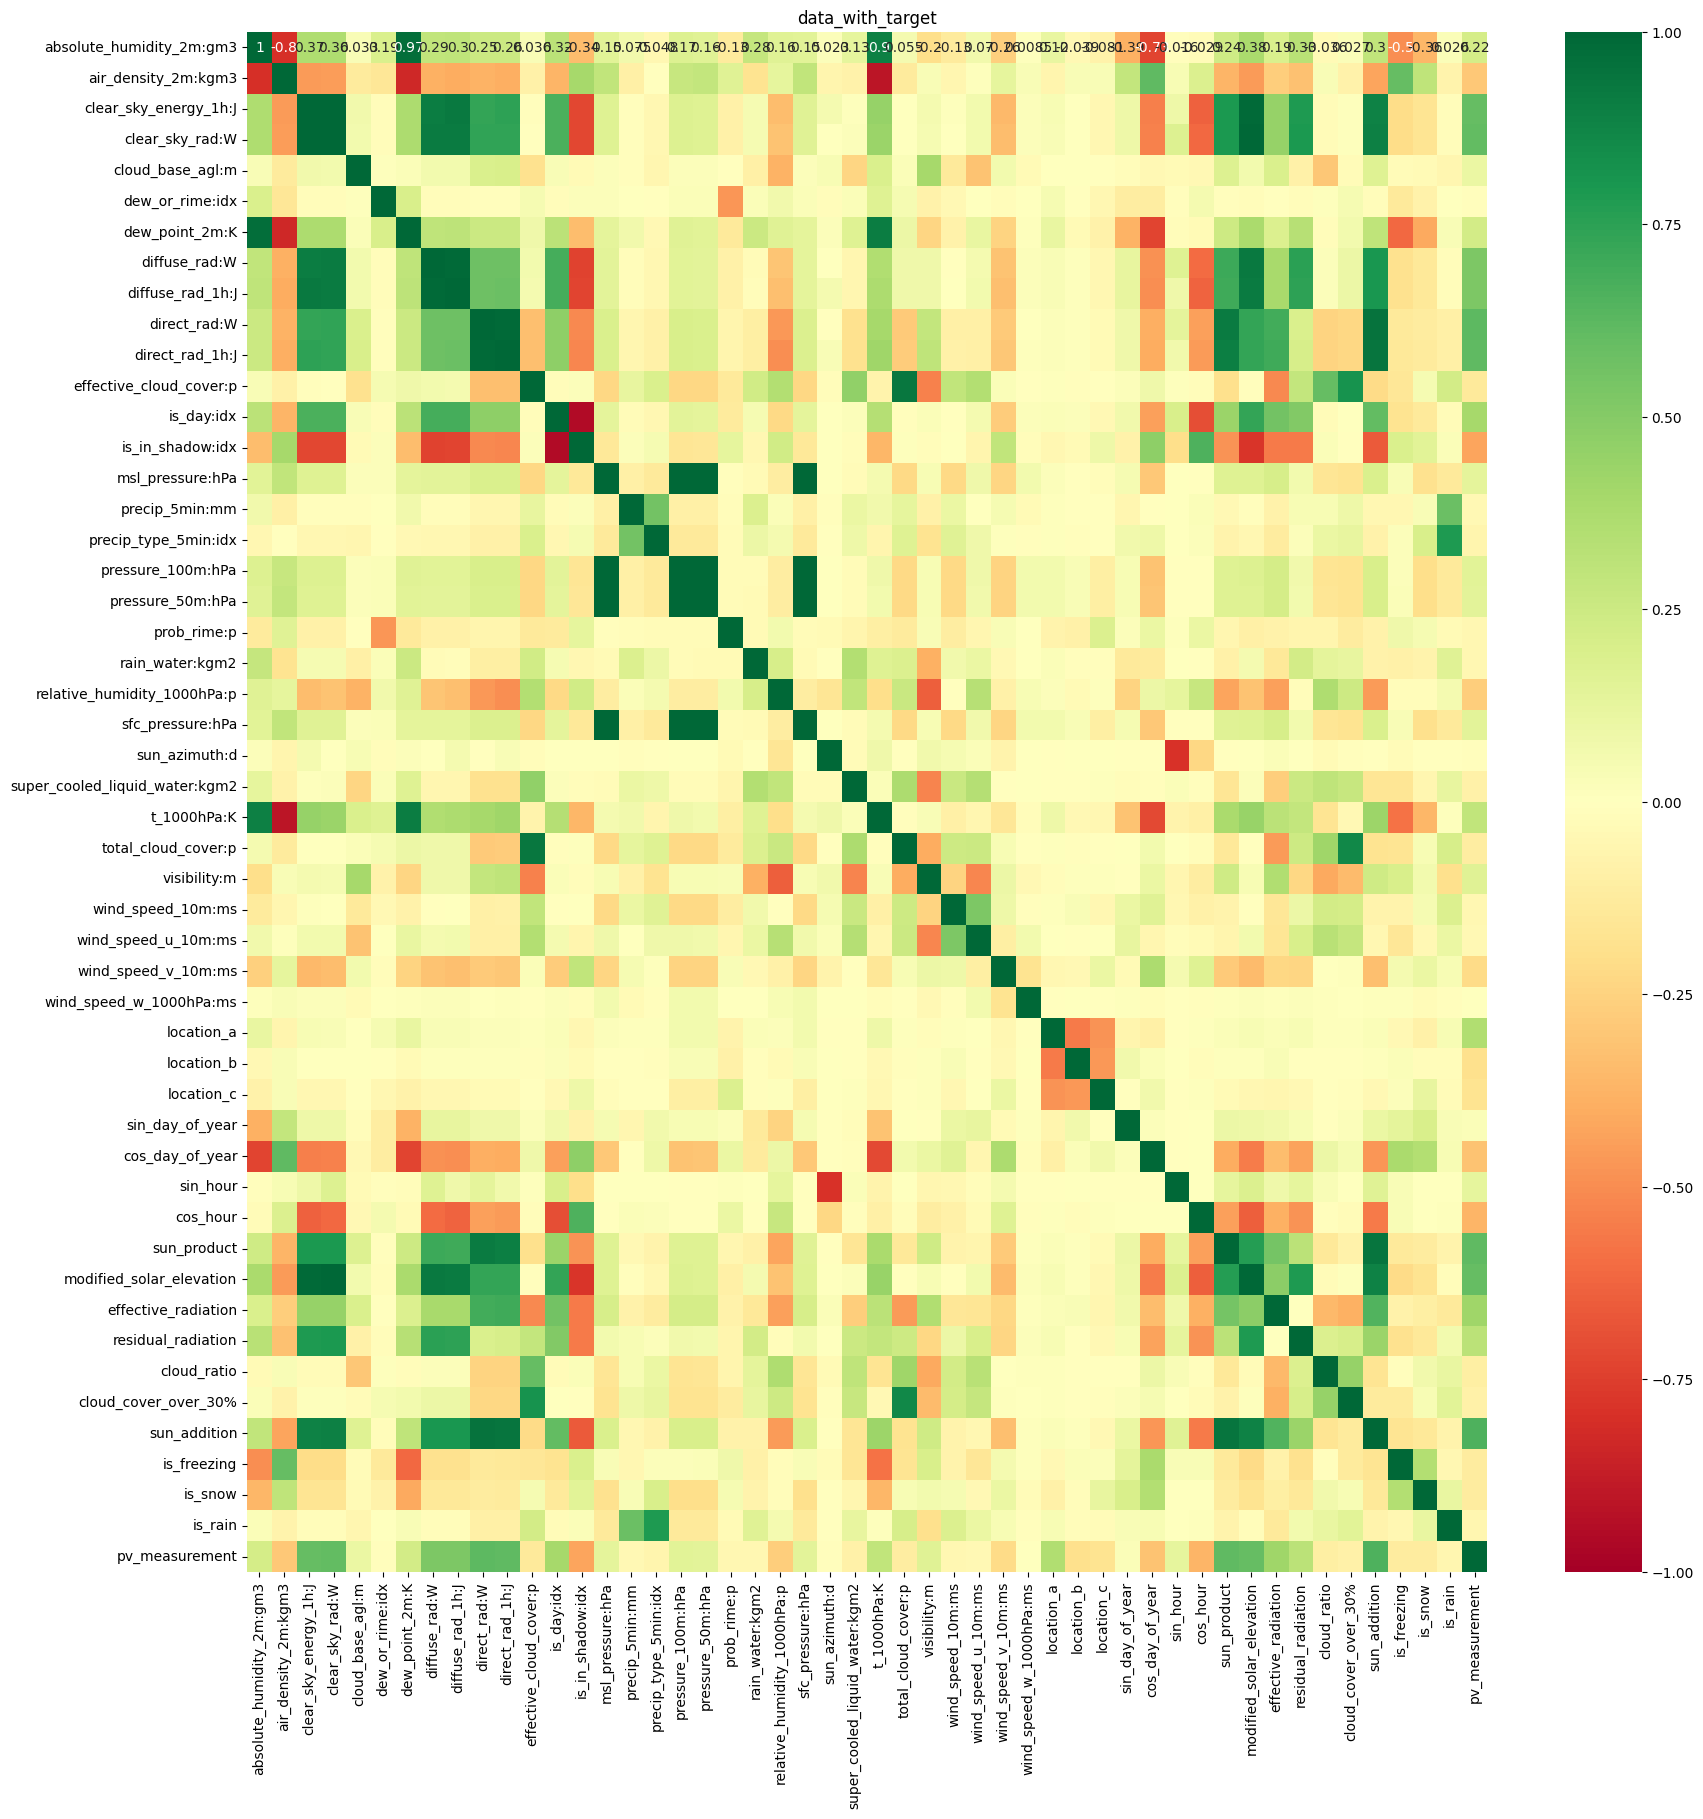

In [17]:

data_with_target = pd.concat([x_whole, y_whole], axis=1)



plot_correlation_matrix(data_with_target, "data_with_target", show=True)

In [18]:
# data_with_target = data_with_target[data_with_target['effective_cloud_cover:p'] < 50]
# data_with_target = data_with_target[data_with_target['precip_5min:mm'] == 0]

In [19]:
data_with_target.shape

(80864, 50)

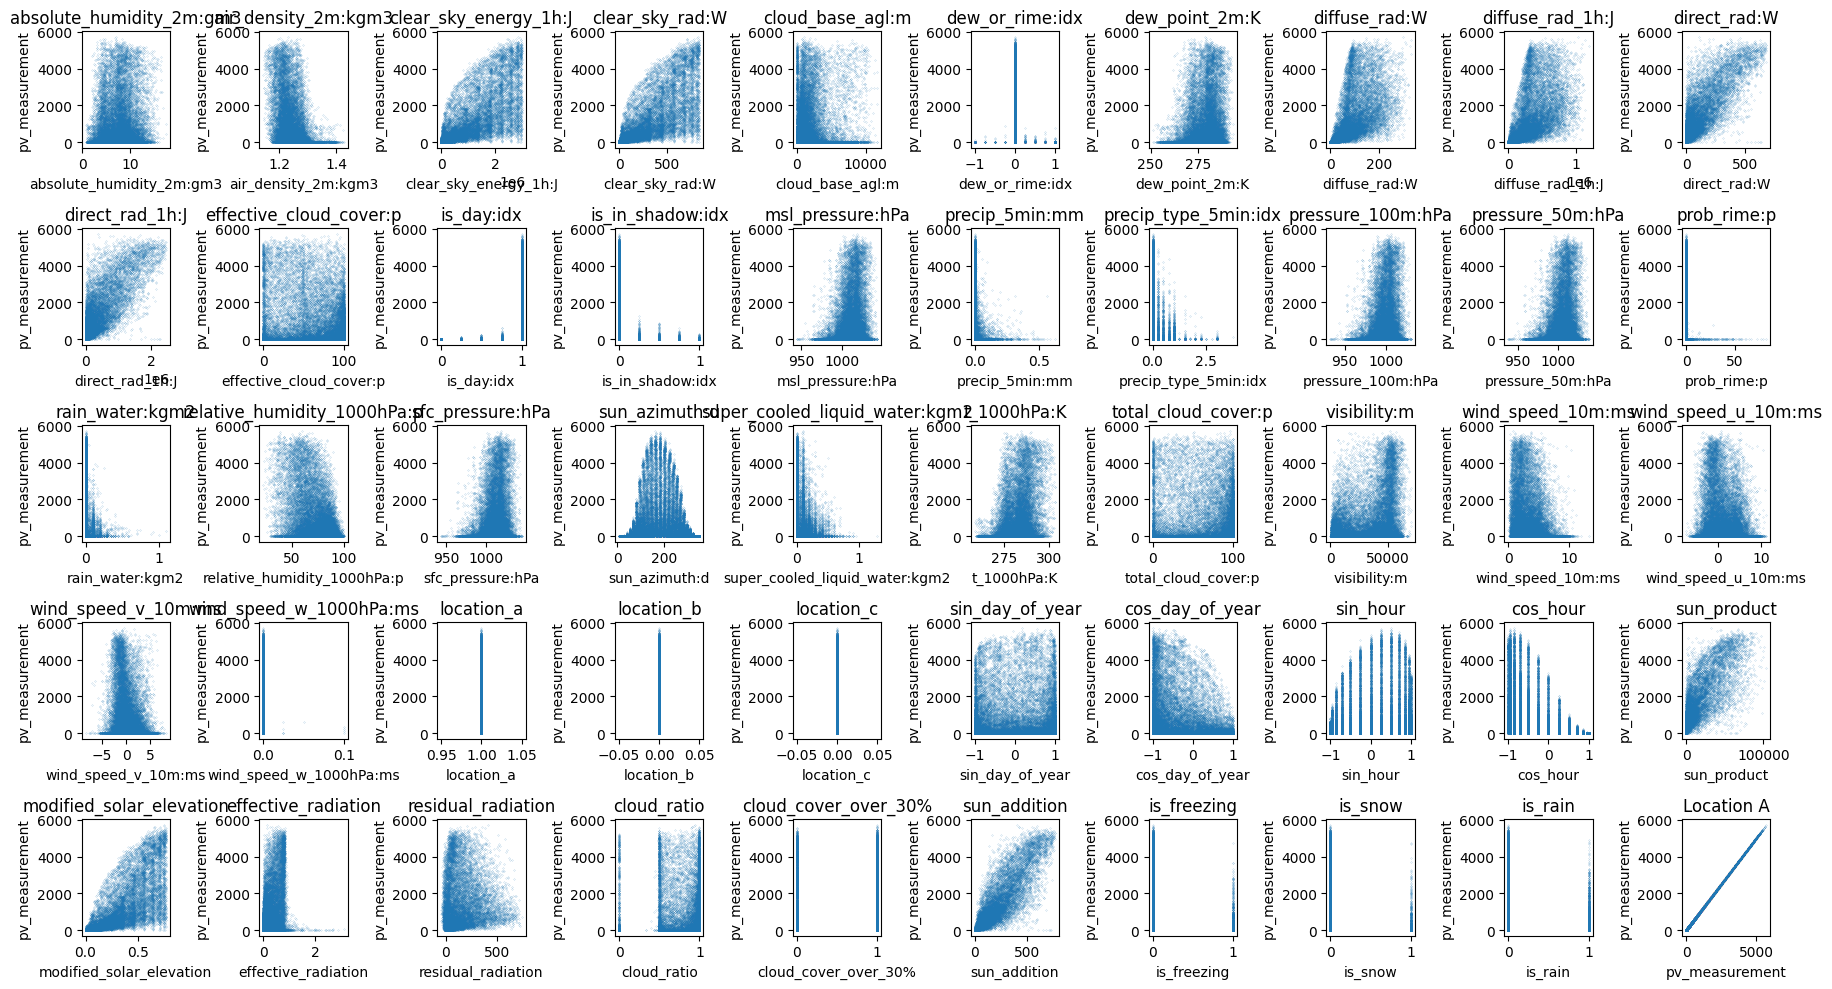

In [20]:
data_with_target_a = data_with_target[data_with_target['location_a'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_a.columns):
    ax.scatter(data_with_target_a[feature], data_with_target_a['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location A")
plt.savefig("results/figures/feature_engineering/location_a_correlation_with_pv.png")
plt.show()

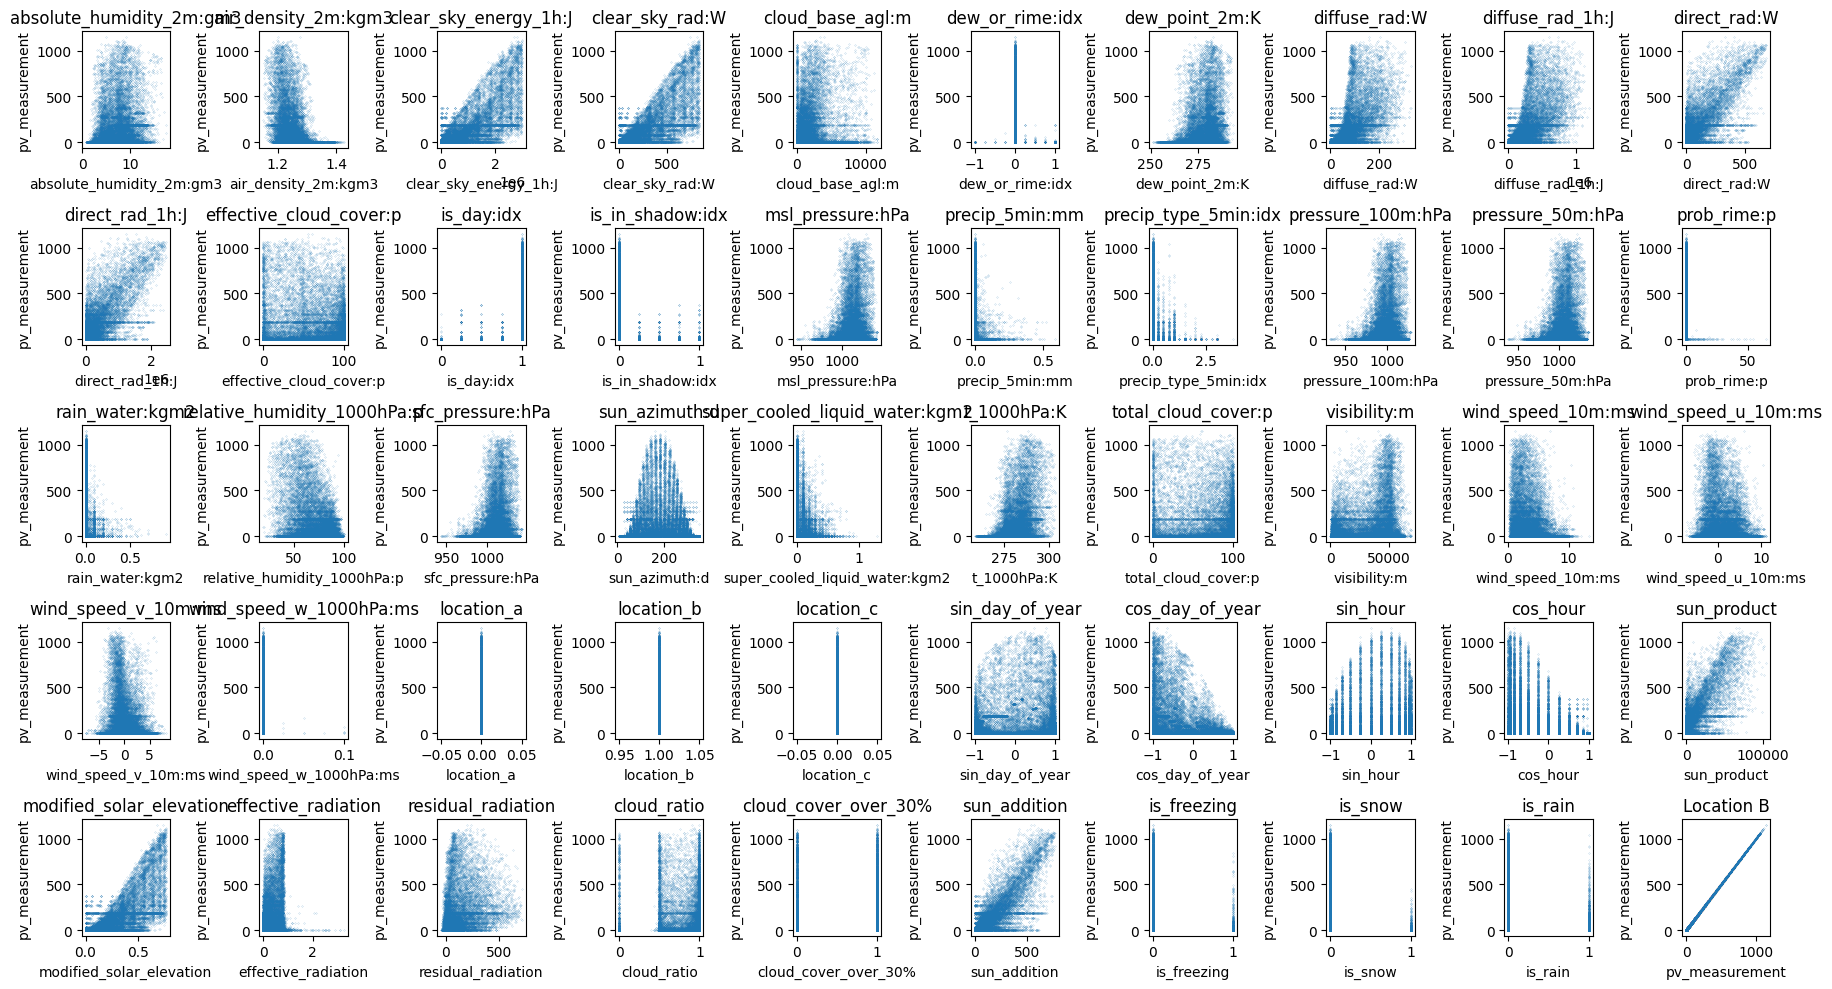

In [21]:
data_with_target_b = data_with_target[data_with_target['location_b'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_b.columns):
    ax.scatter(data_with_target_b[feature], data_with_target_b['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location B")
plt.savefig("results/figures/feature_engineering/location_b_correlation_with_pv.png")
plt.show()

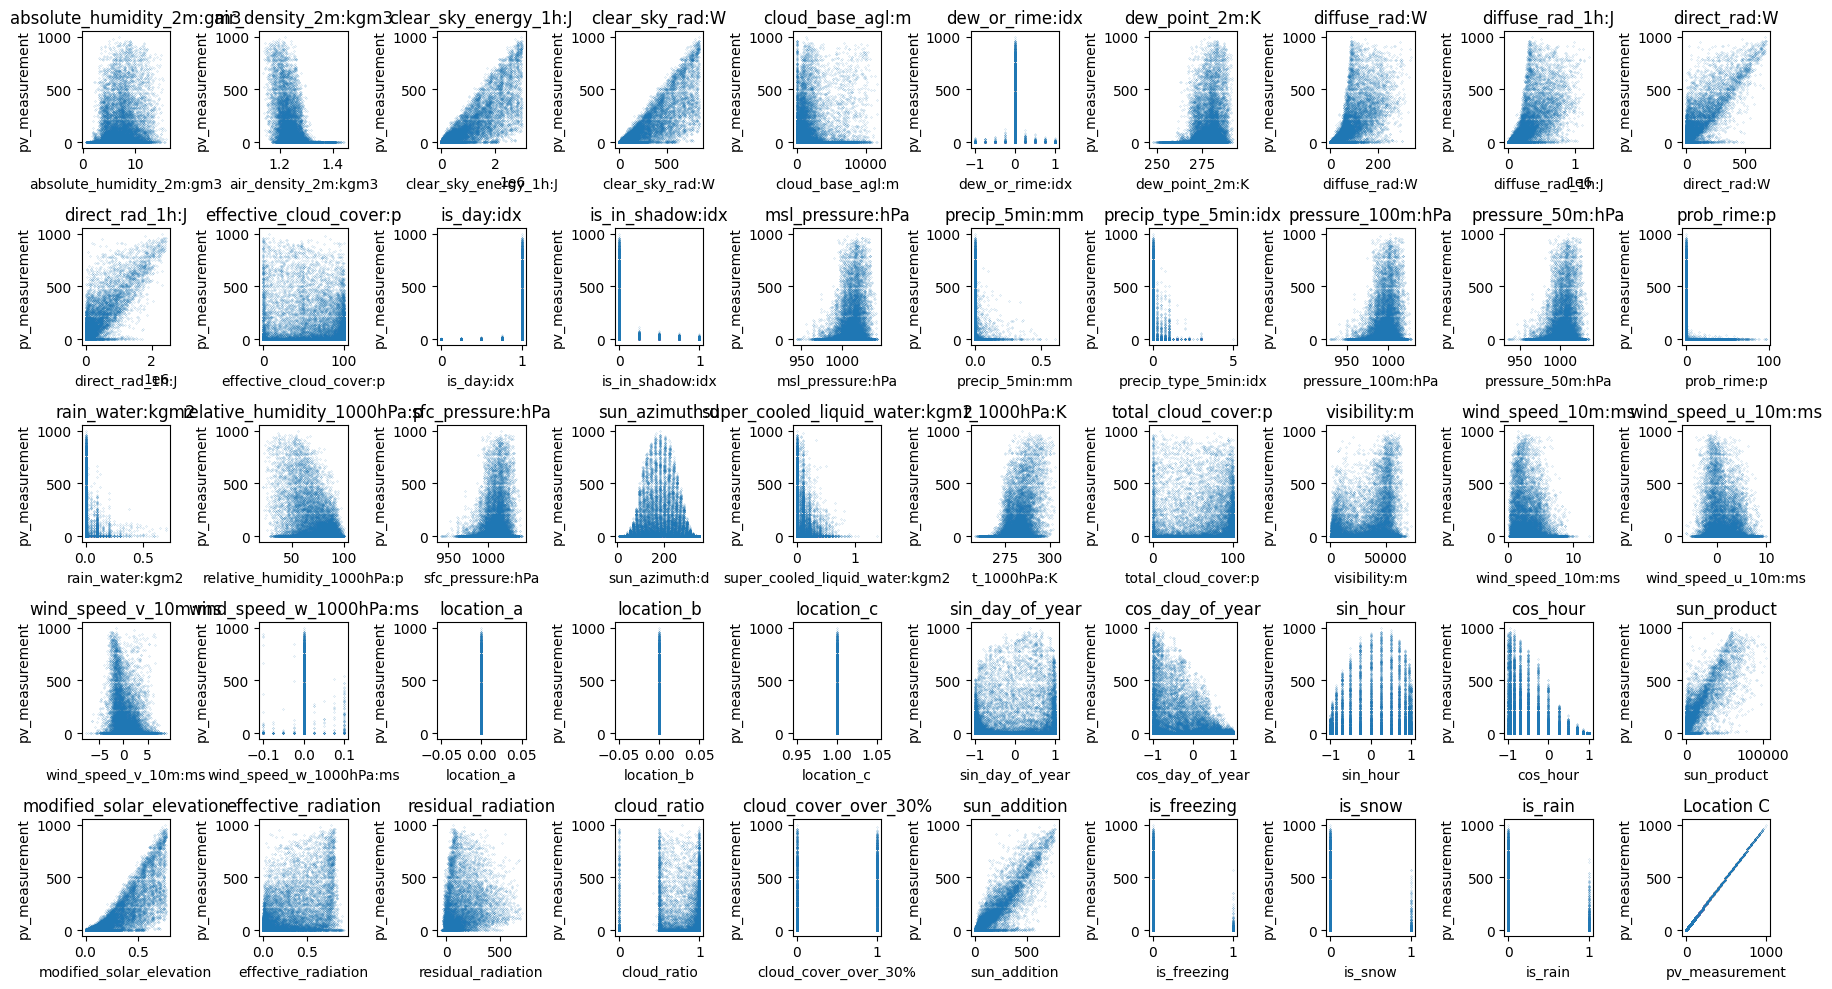

In [22]:
data_with_target_c = data_with_target[data_with_target['location_c'] == 1]
fig, axs = plt.subplots(5, 10, figsize=(18, 10))  # Create a grid of 5x9 subplots

# Flatten the axis array and iterate over both the flattened array and the column names
# Assuming df is your DataFrame and you have stored all feature names in a list called feature_names
for ax, feature in zip(axs.flatten(), data_with_target_c.columns):
    ax.scatter(data_with_target_c[feature], data_with_target_c['pv_measurement'], s=0.01)  # Replace with your column names
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('pv_measurement')

# Adjust the layout so that plots do not overlap
plt.tight_layout()
plt.title("Location C")
plt.savefig("results/figures/feature_engineering/location_c_correlation_with_pv.png")
plt.show()

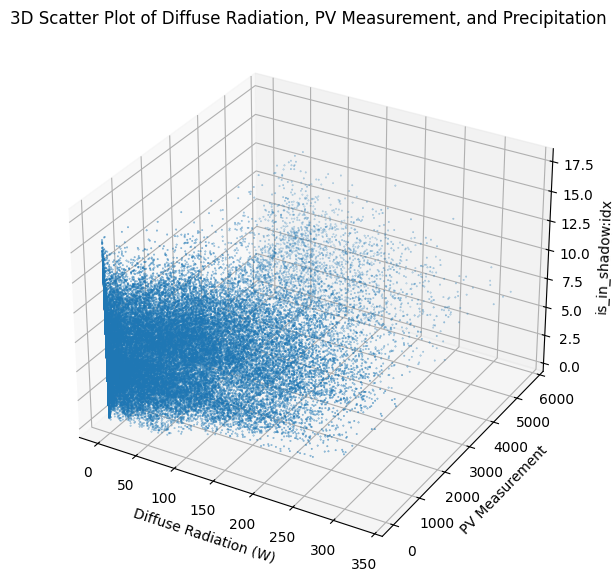

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_with_target['diffuse_rad:W'], data_with_target['pv_measurement'], data_with_target['absolute_humidity_2m:gm3'], s=0.1)

ax.set_xlabel('Diffuse Radiation (W)')
ax.set_ylabel('PV Measurement')
ax.set_zlabel('is_in_shadow:idx')

plt.title('3D Scatter Plot of Diffuse Radiation, PV Measurement, and Precipitation')
plt.savefig("results/figures/feature_engineering/3d_scatter_plot.png")
plt.show()

In [24]:

# pd.set_option('display.max_rows', 200)

mask = (data_with_target['direct_rad:W'] > 500) & (data_with_target['pv_measurement'] < 2000)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(5)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,sun_addition,is_freezing,is_snow,is_rain,pv_measurement
11,9.450,1.18575,2832616.25,810.974976,0.000000,0.0,283.899994,82.625000,294008.12500,659.599976,2295237.000,0.000,1.0,0.0,1018.950012,0.0,0.0,1003.450012,1009.349976,0.0,0.0,46.650002,1015.200012,158.496002,0.0,292.649994,0.000000,56545.050781,2.90,-1.825,-2.275,0.0,0,0,1,0.027950,-0.999609,5.000000e-01,-0.866025,54499.449219,0.747021,0.810289,68.750000,0.000000,0,742.224976,0,0,0,862.4000
191,6.550,1.17775,2939757.25,803.150024,2571.850098,0.0,278.799988,93.224998,322686.25000,637.349976,2358780.000,13.475,1.0,0.0,1022.950012,0.0,0.0,1007.574951,1013.375000,0.0,0.0,26.924999,1019.174988,202.254242,0.0,295.649994,13.600000,59694.074219,1.15,0.575,-0.925,0.0,0,0,1,0.472759,-0.881192,1.224647e-16,-1.000000,59416.949219,0.737961,0.802372,72.575050,0.990809,0,730.574951,0,0,0,823.2000
243,8.400,1.21400,2472362.75,727.724976,3908.699951,0.0,281.899994,122.150002,391941.46875,515.075012,1792874.625,44.875,1.0,0.0,1020.250000,0.0,0.0,1007.549988,1013.450012,0.0,0.0,53.900002,1019.450012,139.084503,0.0,288.825012,63.150002,54963.851562,1.10,0.500,0.950,0.0,0,1,0,-0.228058,-0.973648,7.071068e-01,-0.707107,62916.414062,0.682142,0.725166,90.499962,0.710610,1,637.225037,0,0,0,302.7375
338,8.975,1.17700,2986444.75,834.074951,10162.500000,0.0,283.299988,90.300003,340745.78125,662.150024,2336793.250,6.800,1.0,0.0,1021.049988,0.0,0.0,1005.650024,1011.450012,0.0,0.0,39.799999,1017.250000,181.821991,0.0,294.924988,13.599999,59067.550781,2.30,1.375,-1.875,0.0,0,0,1,0.298569,-0.954388,2.588190e-01,-0.965926,59792.148438,0.763475,0.782467,81.624924,0.500000,0,752.450012,0,0,0,921.2000
452,7.950,1.21500,2862638.50,817.375000,0.000000,0.0,281.149994,88.724998,316332.78125,657.799988,2289891.000,0.000,1.0,0.0,1029.199951,0.0,0.0,1013.400024,1019.400024,0.0,0.0,52.250000,1025.400024,160.924744,0.0,287.450012,0.000000,51763.425781,1.60,-0.375,-1.550,0.0,0,0,1,0.347403,-0.937716,5.000000e-01,-0.866025,58363.304688,0.750143,0.799923,70.850014,0.000000,0,746.524963,0,0,0,940.8000


In [25]:

mask = (data_with_target['direct_rad:W'] > 500) & (data_with_target['pv_measurement'] > 5000)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(5)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,sun_addition,is_freezing,is_snow,is_rain,pv_measurement
485,6.90,1.21750,2836524.75,810.474976,0.000000,0.0,279.000000,89.025002,319541.34375,675.174988,2345660.000,13.500000,1.0,0.0,1017.000000,0.0,0.0,1003.875000,1009.900024,0.0,0.0,51.700001,1015.900024,160.718002,0.0,285.174988,26.950001,51809.000000,0.975,0.500,-0.850,0.0,1,0,0,0.442168,-0.896932,0.500000,-0.866025,60107.453125,0.743892,0.826949,46.274986,0.500928,0,764.200012,0,0,0,5402.32
562,8.25,1.20175,2986601.50,835.099976,6579.450195,0.0,281.625000,94.574997,342361.31250,678.700012,2411771.000,16.150000,1.0,0.0,1010.650024,0.0,0.0,997.700012,1003.650024,0.0,0.0,54.400002,1009.599976,180.687744,0.0,287.375000,30.424999,49697.148438,1.250,-0.475,-1.175,0.0,1,0,0,0.215477,-0.976509,0.258819,-0.965926,64188.050781,0.764899,0.807530,61.824966,0.530813,0,773.275024,0,0,0,5265.48
1015,9.30,1.20550,2951779.50,824.849976,5792.450195,0.0,283.575012,164.100006,678417.00000,519.174988,1600007.500,42.549999,1.0,0.0,1024.449951,0.0,0.0,1011.500000,1017.424988,0.0,0.0,55.075001,1023.400024,181.389008,0.0,290.149994,58.500000,51271.574219,2.150,2.100,-0.625,0.0,1,0,0,0.457531,-0.889193,0.258819,-0.965926,85196.617188,0.754821,0.542048,141.574982,0.727350,1,683.275024,0,0,0,5185.18
1062,4.40,1.24700,2432994.75,715.049988,7897.600098,0.0,272.375000,90.050003,316779.50000,588.224976,1991261.125,9.200000,1.0,0.0,1025.675049,0.0,0.0,1012.299988,1018.450012,0.0,0.0,42.625000,1024.599976,143.104996,0.0,280.899994,18.400000,52757.351562,3.850,-3.050,-2.350,0.0,1,0,0,0.718792,-0.695225,0.707107,-0.707107,52969.660156,0.665973,0.818440,36.775009,0.500000,0,678.274963,0,0,0,5392.42
1618,6.50,1.22150,2971860.00,829.724976,1334.550049,0.0,278.125000,86.875000,347708.56250,676.599976,2342172.500,5.275000,1.0,0.0,1019.125000,0.0,0.0,1005.900024,1011.900024,0.0,0.0,55.075001,1017.900024,182.175003,0.0,284.424988,6.600000,51935.226562,1.400,-0.250,-1.400,0.0,1,0,0,0.379453,-0.925211,0.258819,-0.965926,58779.621094,0.759354,0.788117,66.250000,0.799242,0,763.474976,0,0,0,5098.50


In [26]:
data_with_target

mask = (data_with_target['prob_rime:p'] > 10)

# Apply the mask to get the desired rows
filtered_df = data_with_target[mask]


filtered_df.head(200)

,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,sun_azimuth:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,location_a,location_b,location_c,sin_day_of_year,cos_day_of_year,sin_hour,cos_hour,sun_product,modified_solar_elevation,effective_radiation,residual_radiation,cloud_ratio,cloud_cover_over_30%,sun_addition,is_freezing,is_snow,is_rain,pv_measurement
137,4.200,1.29000,0.000000,0.000,520.199951,-1.0,271.274994,0.000,0.000000,0.0,0.000000,19.174999,0.00,1.00,1009.825012,0.0,0.0,994.349976,1000.599976,14.975000,0.0,93.699997,1006.900024,46.095501,0.0,275.175018,21.275000,22947.851562,1.50,-0.375,1.500,0.0,0,0,1,0.995827,0.091261,0.500000,0.866025,0.000000,0.000000,0.00000,0.000000,0.901293,0,0.000000,0,0,0,0.0
226,2.450,1.30550,0.000000,0.000,6286.299805,-1.0,264.625000,0.000,0.000000,0.0,0.000000,63.700001,0.00,1.00,998.000000,0.0,0.0,982.400024,988.724976,31.125000,0.0,82.599998,995.099976,302.481506,0.0,272.299988,100.000000,44141.273438,1.70,0.000,1.700,0.0,0,0,1,-0.055879,0.998438,-0.866025,0.500000,0.000000,0.000000,0.00000,0.000000,0.637000,1,0.000000,1,1,0,0.0
462,4.000,1.27800,0.000000,0.000,1703.025024,-1.0,270.725006,0.000,0.000000,0.0,0.000000,47.775002,0.00,1.00,998.400024,0.0,0.0,983.000000,989.200012,30.725002,0.0,85.900002,995.425049,178.790009,0.0,276.175018,49.700001,34784.578125,1.95,0.475,1.925,0.0,0,0,1,0.891640,0.452745,-0.258819,0.965926,0.000000,0.000000,0.00000,0.000000,0.961268,1,0.000000,0,0,0,0.0
483,5.000,1.28800,0.000000,0.000,1086.150024,-0.5,273.600006,0.000,0.000000,0.0,0.000000,0.900000,0.00,1.00,1018.625000,0.0,0.0,1005.700012,1012.000000,10.275000,0.0,77.250000,1018.299988,44.190750,0.0,277.024994,1.800000,47981.476562,1.05,-0.975,0.325,0.0,1,0,0,-0.611530,0.791221,0.258819,0.965926,0.000000,0.000000,0.00000,0.000000,0.500000,0,0.000000,0,0,0,0.0
484,3.400,1.27550,0.000000,0.000,1238.099976,-1.0,268.625000,0.000,0.000000,0.0,0.000000,51.900002,0.00,1.00,992.000000,0.0,0.0,976.549988,982.750000,41.000000,0.0,81.800003,989.000000,302.843018,0.0,273.149994,99.500000,42727.949219,2.00,-1.800,0.900,0.0,0,0,1,0.447945,0.894061,-0.866025,0.500000,0.000000,0.000000,0.00000,0.000000,0.521608,1,0.000000,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9462,3.300,1.31800,17110.250000,18.150,0.000000,-1.0,268.100006,11.725,21081.476562,0.0,0.000000,0.250000,0.75,1.00,1028.275024,0.0,0.0,1012.275024,1018.700012,27.225000,0.0,67.925003,1025.149902,72.765503,0.0,272.625000,0.250000,31244.574219,1.25,-0.300,1.200,0.0,0,0,1,0.976277,-0.216527,0.866025,0.500000,0.000000,0.040328,0.00000,6.424999,1.000000,0,11.725000,1,0,0,9.8
9561,4.725,1.29200,31225.175781,27.275,0.000000,-0.5,272.799988,18.500,33331.476562,7.2,12945.650391,2.975000,1.00,0.75,1022.349976,0.0,0.0,1006.724976,1013.049988,14.050000,0.0,75.099998,1019.375000,72.460251,0.0,279.524994,5.950000,26403.500000,0.60,0.050,0.600,0.0,0,0,1,0.963807,-0.266599,0.866025,0.500000,133.199997,0.058318,0.41459,1.575001,0.500000,0,25.700001,0,0,0,19.6
9653,4.350,1.29100,0.000000,0.000,989.849976,-1.0,271.649994,0.000,0.000000,0.0,0.000000,67.425003,0.00,1.00,1016.450012,0.0,0.0,1000.750000,1007.049988,71.949997,0.0,85.050003,1013.349976,181.688995,0.0,274.649994,70.300003,26513.875000,0.80,0.250,0.800,0.0,0,0,1,0.903946,-0.427646,-0.258819,0.965926,0.000000,0.000000,0.00000,0.000000,0.959104,1,0.000000,0,0,0,0.0
9673,5.150,1.26400,0.000000,

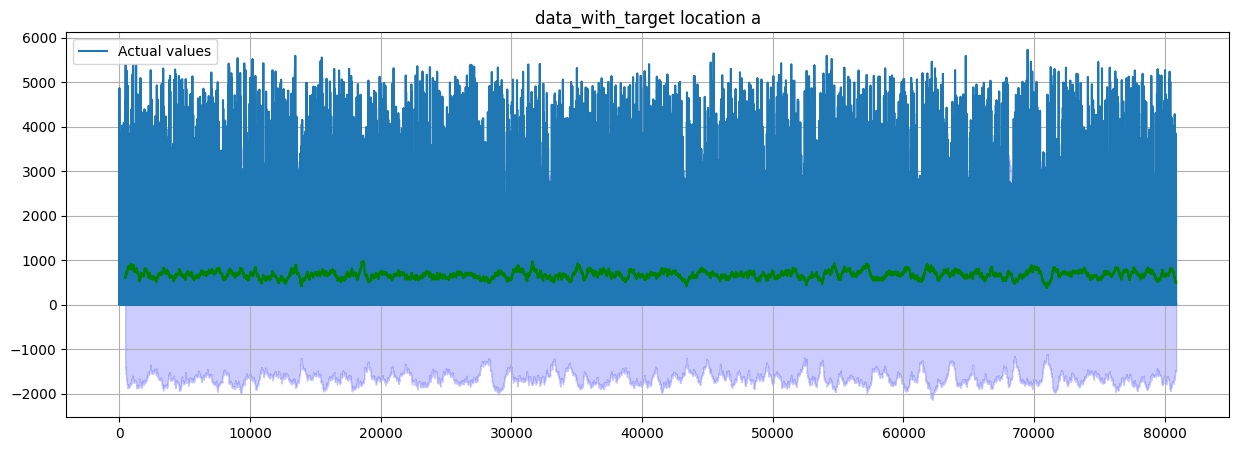

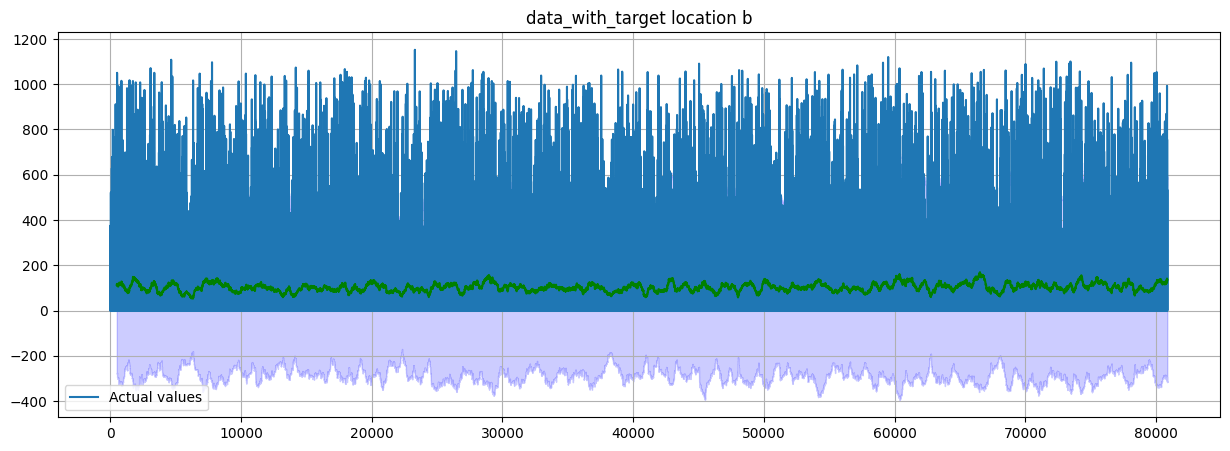

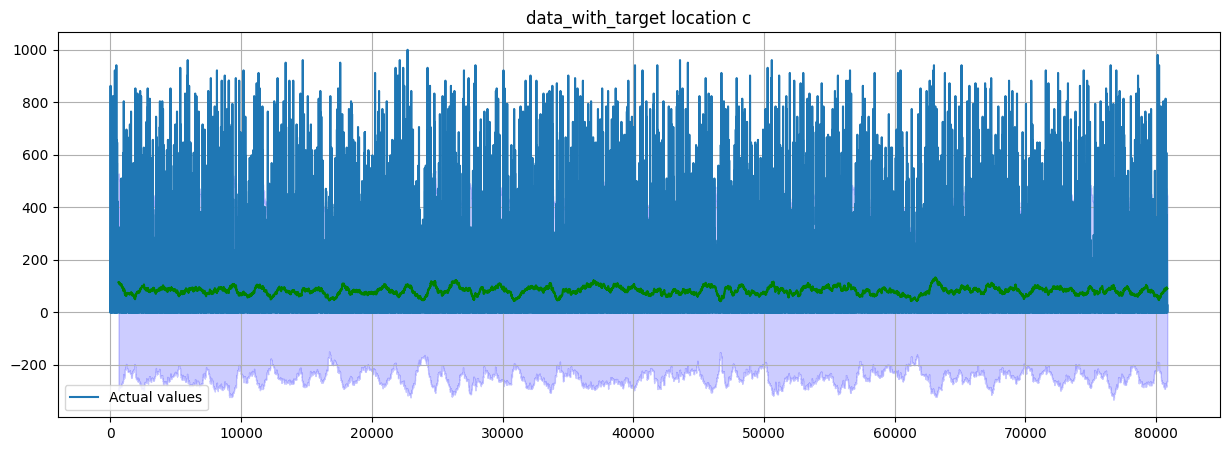

In [27]:
from src.visualization.plotting import plot_moving_average
# Compute moving averages for trend analysis for Location A, B and C
plot_moving_average(data_with_target_a['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location a")
plot_moving_average(data_with_target_b['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location b")
plot_moving_average(data_with_target_c['pv_measurement'], window=24*7, plot_intervals=True, title="data_with_target location c")